In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [3]:
#let's load the data

df = pd.read_excel("/content/Raw_data.xlsx", sheet_name = "CustomerDemographic")
df.head()

<ipython-input-3-dca4474c7180>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel("/content/Raw_data.xlsx", sheet_name = "CustomerDemographic")


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
#load starting 5 rows
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
#checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [7]:
#Let's check for the number of rows and columns

print("Total number of rows are: ", df.shape[0])
print("Total number of columns are: ", df.shape[1])

Total number of rows are:  4000
Total number of columns are:  13


In [16]:
#Bifurcate the data into numerical columns and categorical columns

num_cols = df.select_dtypes(include = "number")
print("Numerical columns are: ",num_cols.columns.values)

print("\n")

cat_colss = df.select_dtypes(exclude = "number")
print("Categorical columns are: ",cat_colss.columns.values)

Numerical columns are:  ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']


Categorical columns are:  ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


1. Removing irrelevant column

In [23]:
df.drop(labels = {"default"}, axis = 1, inplace = True)

In [24]:
df.columns.values

array(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'], dtype=object)

2. Checking missing values

In [25]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [26]:
#percentage of missing values

df.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

#### Here multiple data points are missing like last_name - 3%, DOB - 2%, job_title - 13%, job_industry_category = 16% and tenure as 2%. Let's start with last name

2.1 last_name data treatment

In [28]:
df["last_name"].isnull().sum()

125

In [29]:
#Since all the customers have first name so having last name is not required

df["last_name"].fillna("None", axis = 0, inplace = True)

In [30]:
df["last_name"].isnull().sum()

0

2.1 DOB data treatment

In [31]:
df["DOB"].isnull().sum()

87

In [33]:
df[df["DOB"].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [34]:
round(df["DOB"].isnull().mean()*100)

2

In [36]:
#Since the DOB missing data is 2% of the data so can remove them

df[df["DOB"].isnull()].index

Int64Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,
             581,  598,  679,  684,  798,  838,  882,  891,  949,  974,  982,
             995, 1037, 1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582,
            1627, 1682, 1739, 1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020,
            2068, 2164, 2204, 2251, 2294, 2334, 2340, 2413, 2425, 2468, 2539,
            2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998, 3011, 3085, 3150,
            3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364, 3472, 3509,
            3512, 3564, 3653, 3717, 3726, 3778, 3882, 3930, 3934, 3997],
           dtype='int64')

In [37]:
df_dob_drop = df[df["DOB"].isnull()].index
df_dob_drop

Int64Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,
             581,  598,  679,  684,  798,  838,  882,  891,  949,  974,  982,
             995, 1037, 1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582,
            1627, 1682, 1739, 1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020,
            2068, 2164, 2204, 2251, 2294, 2334, 2340, 2413, 2425, 2468, 2539,
            2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998, 3011, 3085, 3150,
            3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364, 3472, 3509,
            3512, 3564, 3653, 3717, 3726, 3778, 3882, 3930, 3934, 3997],
           dtype='int64')

In [38]:
df.drop(index = df_dob_drop, axis = 0, inplace = True)

In [39]:
df["DOB"].isnull().sum()

0

In [40]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

2.3 job_title data treatment

In [41]:
df["job_title"].isnull().mean()*100

12.701252236135957

In [ ]:
#since the missing data is around 13% so let's fill it

In [44]:
df["job_title"].fillna("Missing", axis = 0, inplace = True)

In [45]:
df["job_title"].isnull().sum()

0

2.4 job_industry_category data treatment

In [46]:
df["job_industry_category"].isnull().mean()*100

16.76463071811909

In [47]:
#since the missing data is around 17% so let's fill it

df["job_industry_category"].fillna("Missing", axis = 0, inplace = True)
df["job_industry_category"].isnull().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3913 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3913 non-null   object        
 7   job_industry_category                3913 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car    

In [ ]:
#now all the missing data is removed

In [49]:
#creating age column to check further the dob data

#creating age function to calculate the age

def age(born):
  today = date.today()

  return today.year - born.year - ((today.month, today.day) > (born.month, born.day))

df["Age"] = df["DOB"].apply(age)

<ipython-input-50-e1ee643ed9a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], kde = False, bins = 50)


<Axes: xlabel='Age'>

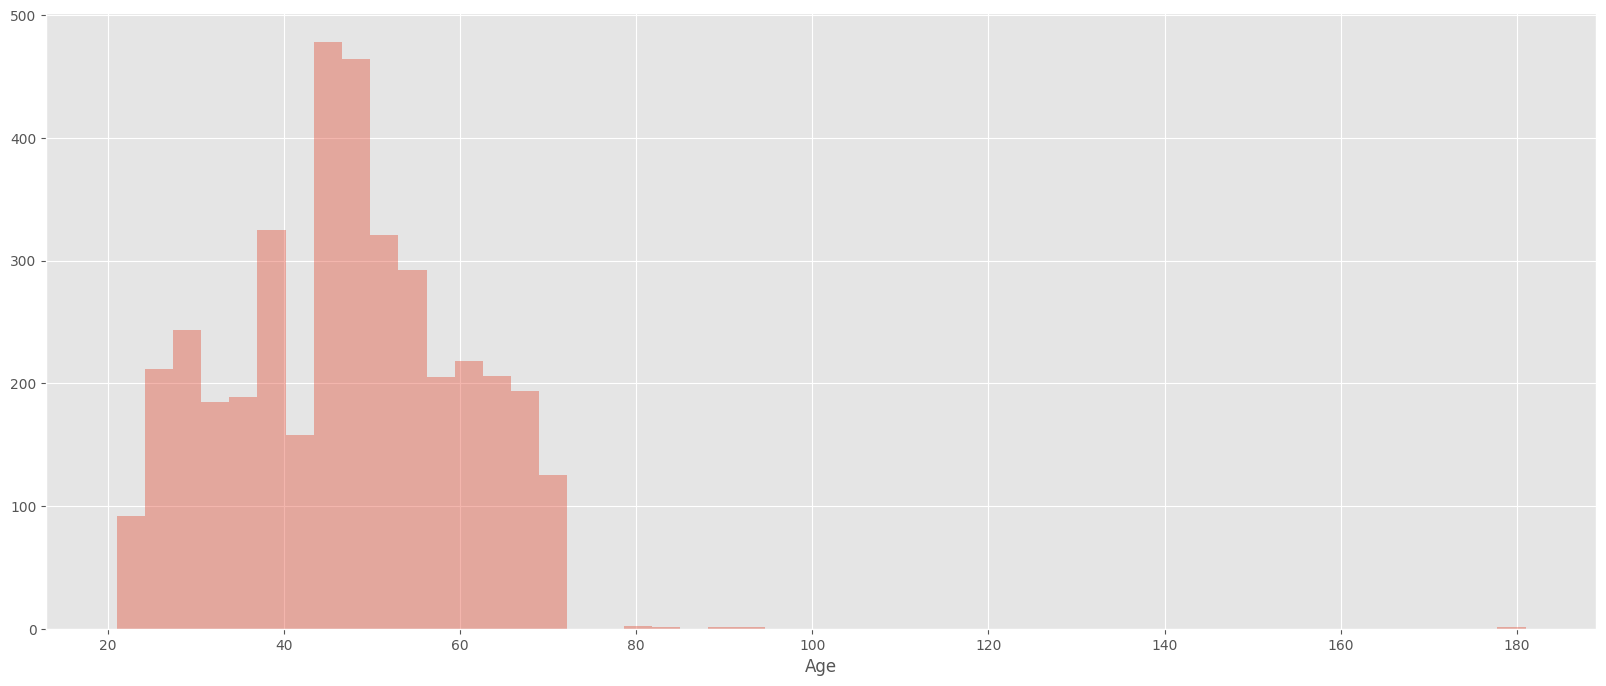

In [50]:
plt.figure(figsize = (20,8))
sns.distplot(df["Age"], kde = False, bins = 50)

In [ ]:
#Seems there is an outlier here, having age greater than 100

In [51]:
df["Age"] > 100

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3998    False
3999    False
Name: Age, Length: 3913, dtype: bool

In [52]:
df[df["Age"] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Missing,IT,Affluent Customer,N,No,20.0,181


In [53]:
#Now let's remove this outlier

age_remove_indeex = df[df["Age"] > 100].index
df.drop(index = age_remove_indeex, axis = 0, inplace = True )

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3912 non-null   int64         
 1   first_name                           3912 non-null   object        
 2   last_name                            3912 non-null   object        
 3   gender                               3912 non-null   object        
 4   past_3_years_bike_related_purchases  3912 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3912 non-null   object        
 7   job_industry_category                3912 non-null   object        
 8   wealth_segment                       3912 non-null   object        
 9   deceased_indicator                   3912 non-null   object        
 10  owns_car    

3. Incosistent Data Check - Let's check the data incosistency like typo, error, unique value. This can be checked in columns - wealth_segment, deceased_indicator, owns_car, gender

In [57]:
df["wealth_segment"].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

In [58]:
df["deceased_indicator"].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

In [59]:
df["owns_car"].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

In [60]:
df["gender"].value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [61]:
def replace_gender(gender):

  if gender == "M":
    return "Male"
  elif gender == "F":
    return "Female"
  elif gender == "Femal":
    return "Female"
  else:
    return gender

df["gender"] = df["gender"].apply(replace_gender)

In [62]:
df["gender"].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

4. Check duplicated data

In [63]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3998    False
3999    False
Length: 3912, dtype: bool

In [64]:
df.duplicated().sum()

0

In [66]:
#double sure about duplicated entry

df[df["customer_id"].duplicated()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age


In [ ]:
#So, no duplicate data found. Time to export this clean data

In [67]:
df.to_csv("Customer_Demographic_Clean.csv", index = False)